In [1]:
import numpy as np
import pandas as pd
from pydataset import data
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math
import evaluate

In [2]:
tips = data('tips')

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [4]:
tips.shape

(244, 7)

In [5]:
tips[:5]

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips = tips.drop(columns=['sex','smoker','day', 'time', 'size'])
X = tips.drop(columns=['tip'])
y = tips['tip']
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

In [7]:
tips['yhat'] = predictions

In [8]:
tips

,total_bill,tip,yhat
1,16.99,1.01,2.704636
2,10.34,1.66,2.006223
3,21.01,3.50,3.126835
4,23.68,3.31,3.407250
5,24.59,3.61,3.502822
...,...,...,...
240,29.03,5.92,3.969131
241,27.18,2.00,3.774836
242,22.67,2.00,3.301175
243,17.82,1.75,2.791807


In [9]:
tips['residuals'] =  tips.tip - tips.yhat

In [10]:
tips[:2]

,total_bill,tip,yhat,residuals
1,16.99,1.01,2.704636,-1.694636
2,10.34,1.66,2.006223,-0.346223


In [11]:
tips['baseline_residuals'] = tips.tip - tips.tip.mean()
tips[:5]

,total_bill,tip,yhat,residuals,baseline_residuals
1,16.99,1.01,2.704636,-1.694636,-1.988279
2,10.34,1.66,2.006223,-0.346223,-1.338279
3,21.01,3.50,3.126835,0.373165,0.501721
4,23.68,3.31,3.407250,-0.097250,0.311721
5,24.59,3.61,3.502822,0.107178,0.611721


In [12]:
### plot residuals 

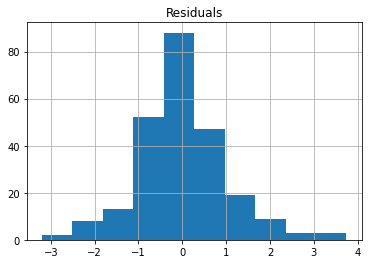

<AxesSubplot:title={'center':'Baseline Residuals'}>

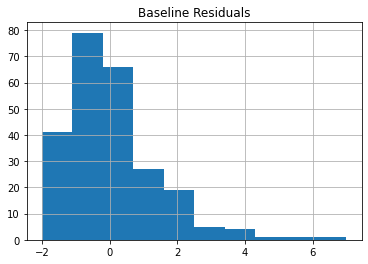

In [13]:
plt.title('Residuals')
tips['residuals'].hist()
plt.show()
plt.title('Baseline Residuals')
tips['baseline_residuals'].hist()


In [14]:
#Sum of squared Errors = a running total of how off our predictions were
sse = (tips.residuals ** 2).sum()
#Mean squared values , average size of our how off our predictions were
mse = sse / tips.shape[0]
#root mean square values, average distance of how off our predictions are
rmse = math.sqrt(mse)
rmse
#In this case, we were off by an avg of $1.01 

1.0178504025697377

In [15]:
sse_baseline = (tips.baseline_residuals ** 2).sum()
mse_baseline = sse_baseline / tips.shape[0]
rmse_baseline = math.sqrt(mse_baseline)
rmse_baseline
#the baseline model was off by 1.38

1.3807999538298954

In [16]:
#sum of squared distances from predictions and average
ess = ((tips.yhat - tips.tip.mean())**2).sum()
#sum of square distances between the actual and average
tss = ((tips.tip - tips.tip.mean())**2).sum()
ess/tss , rmse
#the closer to one, the better.
#in this case, our model is 45% Accurate.

(0.45661658635167607, 1.0178504025697377)

In [17]:
r2_score(tips.tip, tips.yhat), math.sqrt(mean_squared_error(tips.tip, tips.yhat))

(0.45661658635167657, 1.0178504025697377)

In [18]:
#7 what is the variance mean?
sse ,sse_baseline

(252.788743850776, 465.2124770491804)

In [19]:
sse_baseline - sse

212.4237331984044

In [20]:
#our model was able to predict 212.42 total dollars better than the baseline

In [21]:
#8 our model was more accurate as it was only off on avg of $1.01 and the baseline 
#was off with an avg of $1.38

In [22]:
new_tips = data('tips')
new_tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
#remove unused columns
new_tips = new_tips.drop(columns=['sex','smoker','day', 'time', 'size'])


In [24]:
#fit model
X = new_tips.drop(columns=['tip'])
y = new_tips['tip']
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

In [25]:
#9 create functions
new_tips['yhat'] = predictions
new_tips = evaluate.get_risiduals(new_tips, tips.tip, tips.yhat)

In [26]:
new_tips

,total_bill,tip,yhat,risiduals,baseline_risiduals
1,16.99,1.01,2.704636,-1.694636,-1.988279
2,10.34,1.66,2.006223,-0.346223,-1.338279
3,21.01,3.50,3.126835,0.373165,0.501721
4,23.68,3.31,3.407250,-0.097250,0.311721
5,24.59,3.61,3.502822,0.107178,0.611721
...,...,...,...,...,...
240,29.03,5.92,3.969131,1.950869,2.921721
241,27.18,2.00,3.774836,-1.774836,-0.998279
242,22.67,2.00,3.301175,-1.301175,-0.998279
243,17.82,1.75,2.791807,-1.041807,-1.248279


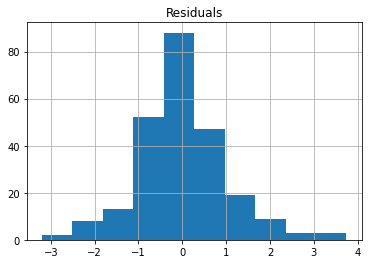

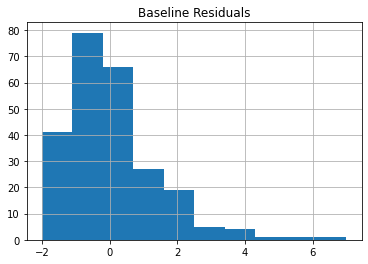

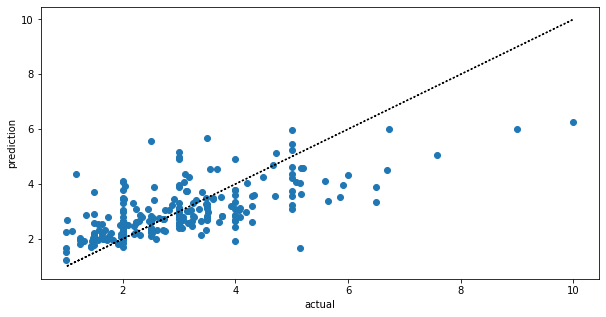

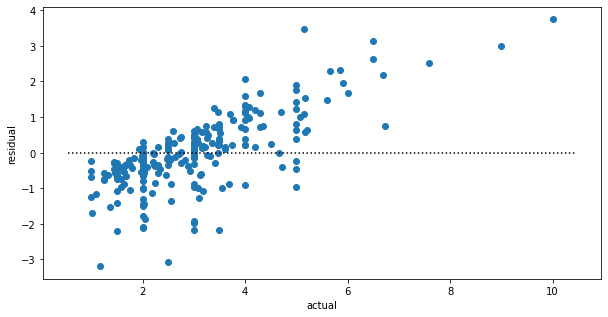

In [27]:
evaluate.plot_residuals(new_tips.tip , new_tips.yhat,  new_tips.risiduals, new_tips.baseline_risiduals)

In [28]:
evaluate.regression_errors(new_tips.tip, new_tips.yhat)

(252.788743850776,
 1.036019442011377,
 1.0178504025697377,
 212.4237331984042,
 465.2124770491804,
 0.45661658635167607)

In [29]:
evaluate.baseline_mean_errors(new_tips.tip)

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [31]:
evaluate.better_than_baseline(new_tips.tip, new_tips.yhat)

True

#### MPG predict gas miliage based on hwy milage

In [60]:
mpg = data('mpg')

In [61]:
mpg[:5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [62]:
new_mpg = mpg.drop(columns=['manufacturer', 'model', 'year','cyl','trans','drv','cty','fl','class'])

In [66]:
#scale data
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(new_mpg)
mpg_scaled = scaler.transform(new_mpg)
mpg_scaled = pd.DataFrame(mpg_scaled, columns=new_mpg.columns)

In [67]:
X = mpg_scaled.drop(columns=['hwy'])
y = mpg_scaled['hwy']
model = LinearRegression().fit(X, y)
mpg_scaled['yhat'] =  model.predict(X)



In [68]:
mpg_scaled = evaluate.get_risiduals(mpg_scaled, mpg_scaled.hwy, mpg_scaled.yhat)

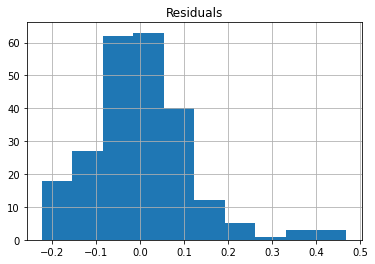

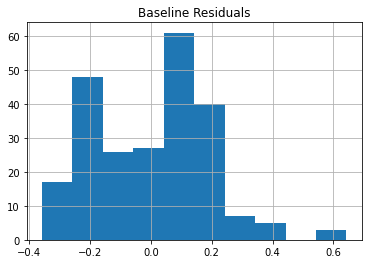

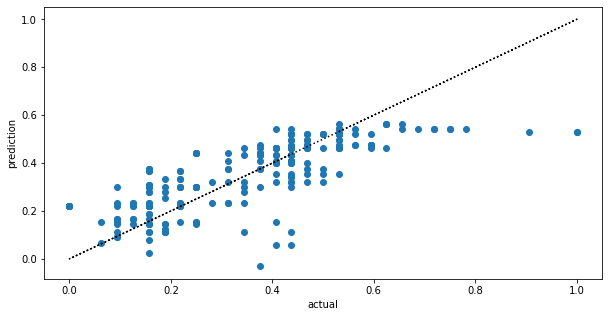

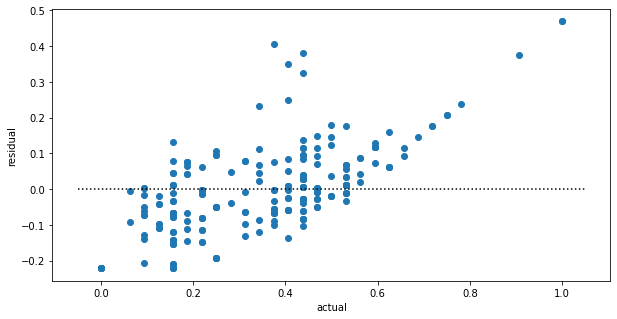

In [70]:
evaluate.plot_residuals(mpg_scaled.hwy, mpg_scaled.yhat, mpg_scaled.risiduals, mpg_scaled.baseline_risiduals)

In [71]:
evaluate.regression_errors(mpg_scaled.hwy, mpg_scaled.yhat)

(3.333817391597136,
 0.01424708287007323,
 0.11936114472504539,
 4.7342122892255105,
 8.068029680822647,
 0.5867866723989037)

In [72]:
evaluate.baseline_mean_errors(mpg_scaled.hwy)

(8.068029680822647, 0.0344787593197549, 0.18568456941747988)

In [73]:
evaluate.better_than_baseline(mpg_scaled.hwy, mpg_scaled.yhat)

True